# Homework_2022_04_18

本次作业共10分，<font color=ff0000> 截止日期 4.22 23:59。</font>


## 一、膨胀与腐蚀(2')
膨胀与腐蚀是常见的图像预处理手段，本题请读入erode_dilate.jpg，并对其进行灰度化、二值化，然后基于OpenCV对图像连续进行膨胀和腐蚀操作（即“闭运算”）。

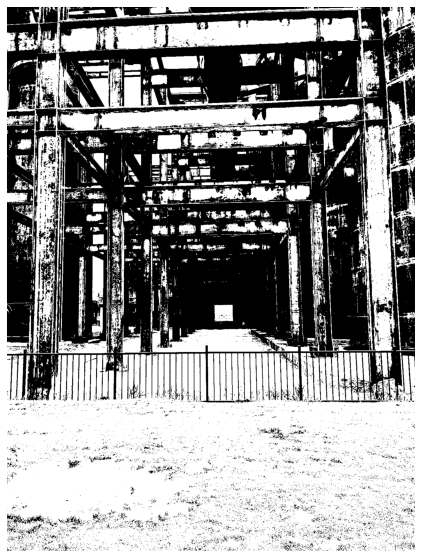

In [71]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline
img = cv.imread('erode_dilate.jpg')
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, binary_img = cv.threshold(gray_img, 100, 255, cv.THRESH_BINARY)
plt.figure(figsize=(16, 10))
plt.axis('off')
plt.imshow(binary_img, plt.cm.gray)

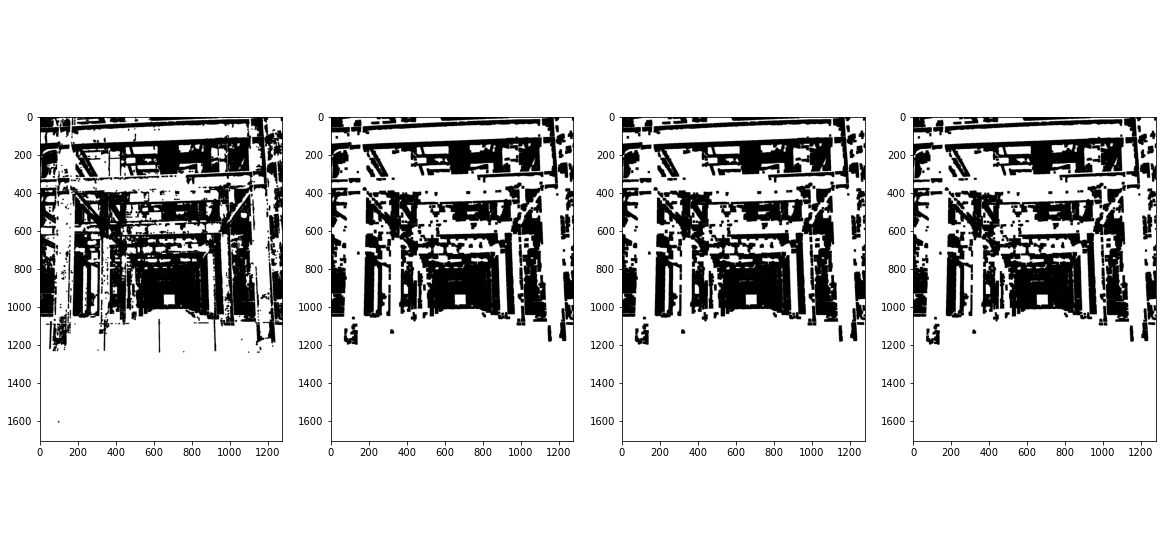

In [72]:
# TODO cv.erode() & cv.dilate()
# kernel大小可以自己决定，因此结果未必要和示例图片完全一致
my_img = cv.imread('erode_dilate.jpg')
my_img2 = cv.cvtColor(my_img, cv.COLOR_BGR2GRAY)
thresh, my_binary = cv.threshold(my_img2, 100, 255, cv.THRESH_BINARY)
kernel1 = np.ones((6, 6))
my_op1 = cv.dilate(my_binary, kernel=kernel1)
my_op2 = cv.erode(my_op1, kernel=kernel1)
kernel_ = np.ones((12, 12))
my_op_ = cv.dilate(my_binary, kernel=kernel_)
my_op__ = cv.erode(my_op_, kernel=kernel_)
kernel2 = np.ones((12, 12))
kernel3 = np.ones((8, 8))
kernel4 = np.ones((4, 4))
my_op3 = cv.dilate(my_binary, kernel=kernel2)
my_op41 = cv.erode(my_op3, kernel=kernel3)
my_op42 = cv.erode(my_op41, kernel=kernel4)
my_op4 = cv.erode(my_op3, kernel=kernel2)
f = plt.figure(figsize=(20, 10))
plt.axis('off')
f.add_subplot(1, 4, 1)
plt.imshow(my_op2, plt.cm.gray)
f.add_subplot(1, 4, 2)
plt.imshow(my_op__, plt.cm.gray)
f.add_subplot(1, 4, 3)
plt.imshow(my_op4, plt.cm.gray)
f.add_subplot(1, 4, 4)
plt.imshow(my_op42, plt.cm.gray)

## 二、Hough算法直线检测(2')
Hough算法可以用于图片中直线或椭圆、圆等形状的检测，本题我们对这种算法进行简单的应用。请对Hough.jpg**首先进行边缘检测**，再应用Hough算法，**画出Hough算法检测出的直线**，阈值可自行设定。

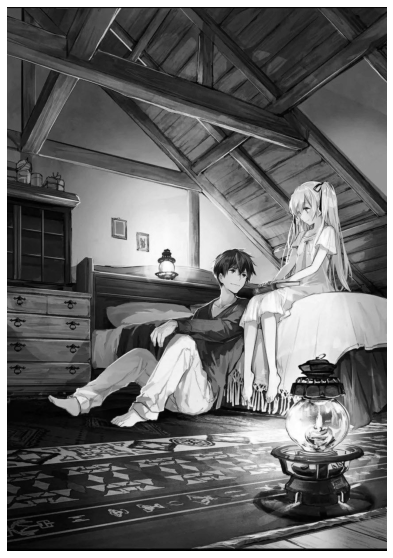

In [73]:
from skimage import transform as st
from skimage import data,feature,io,color

img = color.rgb2gray(io.imread('Hough.jpg'))
plt.figure(figsize=(16, 10))
plt.axis('off')
plt.imshow(img, plt.cm.gray)

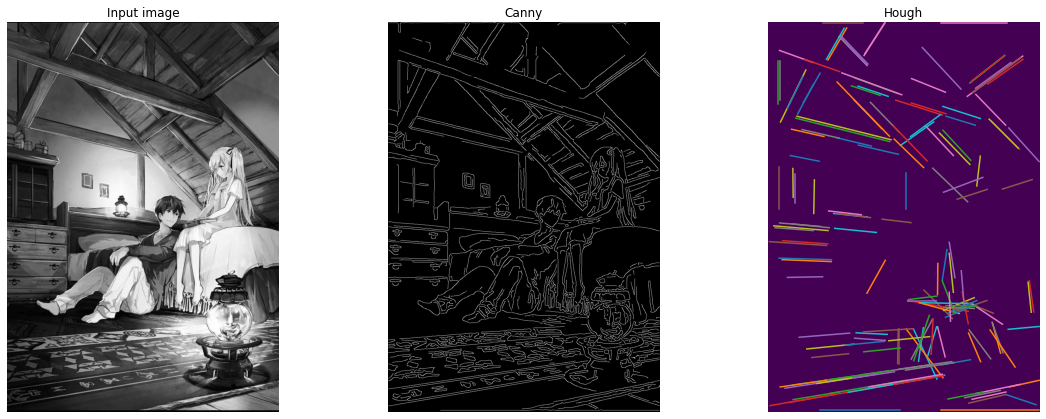

In [74]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 6))
plt.tight_layout()


ax0.imshow(img, plt.cm.gray)
ax0.set_title('Input image')
ax0.set_axis_off()

# TODO

#在ax1中画出canny边缘(e.g. feature.canny())
img_canny = feature.canny(img, sigma=2.5)
ax1.imshow(img_canny, plt.cm.gray)
ax1.set_title('Canny')
ax1.set_axis_off()

#利用Hough算法(e.g. st.probabilistic_hough_line())检测并在ax2中画出所有的直线，阈值可以自己设置，不一定与示例图片相同
houghlines = st.probabilistic_hough_line(img_canny, threshold=10, line_length=90)
#print(houghlines)
img_hough = np.zeros((img.shape[0], img.shape[1]))
#for line in houghlines:
#    cv.line(img_hough, (line[0][0], line[0][1]), (line[1][0], line[1][1]), color=2)
ax2.imshow(feature.canny(img, sigma=100))
for line in houghlines:
    ax2.plot(*zip(*line))
ax2.set_title('Hough')
ax2.set_axis_off()

## 三、离散余弦变换(3')
课上我们学习了离散余弦变换，其最广泛的应用在图片压缩领域；但基于人们对高频信息和低频信息的敏感度区别，离散余弦变换也可以用来实现数字水印、图片加密等等功能。opencv中的cv.dct()&cv.idct()功能可以方便地实现离散余弦变换及逆变换，**如果我们将图片B的频域信息覆盖在图片A的高频部分，一方面图中已经包含了足以重建图片B的信息，另一方面改写高频部分对原图看上去并不会有太大的改观，从而实现“隐藏”了图片B**。

本题所提供的lena_and_more.png看上去是那张最经典的Lena照片，但实际上我在里面藏了另一幅照片，**请从频域信息中提取并重建这幅照片**。

请注意，三个颜色通道都需要进行类似的操作；为简便起见，本题对全图整体进行DCT，不需要额外分割；隐藏图片的大小为256\*256；本题不提供示例输出（否则就不算隐藏了x）。

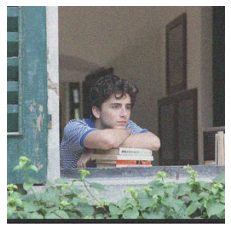

In [75]:
img = cv.cvtColor(cv.imread('lena_and_more.png'), cv.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
# TODO
# 提示：完成DCT后哪个区域被修改对原图影响最小？
img = np.float32(img)
channel_dct = []
channel_B = []
channel_idct = []
channel_new = np.zeros((256, 256, 3))
for i in range(3):
    channel_dct.append(cv.dct(img[:,:,i]))
    channel_B.append(channel_dct[i][256:,256:])
    channel_idct.append(cv.idct(channel_B[i][:,:]))
    channel_new[:,:,i] = channel_idct[i]
channel_new = (channel_new - channel_new.min())/(channel_new.max() - channel_new.min())
plt.imshow(channel_new)

## 四、Seam Carving(3')
Seam Carving可以实现图片的剪裁，而又不会更改图中重点物体的形状。本题我们实现对SC.jpg的剪裁，请**在纵向截去150个像素**，展现Seam Carving后的结果。

以下代码框架可供参考，也可自行更改。

100%|██████████| 150/150 [04:08<00:00,  1.65s/it]


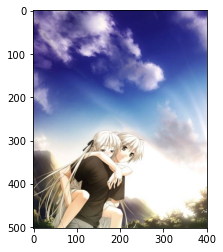

In [76]:
import time
from tqdm import trange

def energy_map(Image):
    # 计算能量
    # 对三通道分别计算横向和纵向梯度值
    # 返回值：三通道相加得到的总能量
    w, h = Image.shape[0], Image.shape[1]
    energymap = np.zeros((w, h))
    for channel in range(3):
        gradient = np.abs(np.gradient(Image[:,:,channel]))
        energymap = energymap+gradient[0]+gradient[1]
#    energymapall = np.zeros((w, h))
#    for channel in range(3):
#        energymapall += energymap[:,:,i]
    return energymap

def find_seam(energy):
    # 动态规划求最小能量路径
    # 返回值：能量，seam路径
    w, h = energy.shape[0], energy.shape[1]
    min_e = np.zeros((w, h))
    min_path = np.zeros((w, h))
    for col in range(h):
        min_e[0, col] = energy[0, col]
        min_path[0, col] = col
    for row in range(1, w):
        for col in range(h):
            min_e[row, col] = energy[row, col] + min_e[row-1, col]
            min_path[row, col] = col
            if col >= 1 and energy[row, col] + min_e[row-1, col-1] < min_e[row, col]:
                min_e[row, col] = energy[row, col] + min_e[row-1, col-1]
                min_path[row, col] = col-1
            if col <= h-2 and energy[row, col] + min_e[row-1, col+1] < min_e[row, col]:
                min_e[row, col] = energy[row, col] + min_e[row-1, col+1]
                min_path[row, col] = col+1
    min_energy = min_e[w-1, 0]
    min_col = 0
    for col in range(1, h):
        if min_e[w-1, col] < min_energy:
            min_energy = min_e[w-1, col]
            min_col = col
    return min_path, min_col


def delete_seam(Image, seam_map, seam_col):
    # 逐行删除对应能量值最小的像素点
    # 返回值：完成一次删除的图像
    w, h = Image.shape[0], Image.shape[1]
    for channel in range(3):
        curcol = seam_col
        for row in range(w-1, -1, -1):
#            Image[row, curcol, channel] = 0
            for col in range(curcol, h-1):
                Image[row, col, channel] = Image[row, col+1, channel]
            curcol = np.int(seam_map[row, curcol])
    Image = Image[:,:h-1,:]
    return Image

def seam_carving(Image, delta):
    # 循环多次剪切
    # 每个循环的内容：先计算能量，再找到seam路径，然后删除路径上的像素点
    # Image传入图像，delta为需要剪切的像素数，本题中为150
    # 返回值：seam carving后的图像
    for _ in trange(delta):
        energy = energy_map(Image)
        seam_path, seam_col = find_seam(energy)
        Image = delete_seam(Image, seam_path, seam_col)
    return Image
    
# 读取SC.jpg并完成seam_carving，请注意剪裁方向为纵向
img = cv.cvtColor(cv.imread('SC.jpg'), cv.COLOR_BGR2RGB)
w_, h_ = img.shape[0], img.shape[1]
img_rot = cv.flip(cv.transpose(img), 0)
img_rot = seam_carving(img_rot, 150)
img_new = cv.flip(cv.transpose(img_rot), 1)
plt.imshow(img_new)